# A Little More Convolutional Net Stuff

- Some more architectures
- Data augmentation


In [4]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

## AlexNet

- ImageNet = 15 million labelled images, 22,000 categories
- ImageNet Large-Scale Visual Recognition Challenge (ILSVRC): Subset of ImageNet with ~1000 images in 1000 categories.
    - 1.2 million training images, 50,000 validation images, 150,000 testing images.
    - Various sizes
- Downsampled to 256x256 resolution
- Top-five error rate of 17%

**General Layout:**

| Layer | Type            | Maps    | Size    | Kernel Size | Stride | Padding | Activation |
|-------|-----------------|---------|---------|-------------|--------|---------|------------|
| Out   | Fully connected | -       | 1,000   | -           | -      | -       | Softmax    |
| F10   | Fully connected | -       | 4,096   | -           | -      | -       | ReLU       |
| F9    | Fully connected | -       | 4,096   | -           | -      | -       | ReLU       |
| S8    | Max Pooling     | 256     | 6x6     | 3x3         | 2      | valid   | -          |
| C7    | Convolution     | 256     | 13x13   | 3x3         | 1      | same    | ReLU       |
| C6    | Convolution     | 384     | 13x13   | 3x3         | 1      | same    | ReLU       |
| C5    | Convolution     | 384     | 13x13   | 3x3         | 1      | same    | ReLU       |
| S4    | Max Pooling     | 256     | 13x13   | 3x3         | 2      | valid   | -          |
| C3    | Convolution     | 256     | 27x27   | 5x5         | 1      | same    | ReLU       |
| S2    | Max Pooling     | 96      | 27x27   | 3x3         | 2      | valid   | -          |
| C1    | Convolution     | 96      | 55x55   | 11x11       | 4      | valid   | ReLU       |
| In    | Input           | 3 (RGB) | 224x224 | -           | -      | -       | -          |
 
 
 **Plus:**
 
 1. **50% Dropout Layers** at outputs of F9 and F10
 
 2. **Local response normalization (LRN)** after C1 and C3:
 
 - Strongly activated neurons inhibit other neurons located at same position in neighboring feature maps
 - Acts as laterial inhibition between feature maps

3. **Data augmentation:**

- Randomly sample 224x224 image from parent 256x256 image
- Horizontal reflections
- Brighten/Dim images
- (Could also rotate, resize, etc. though not done in original paper)


See original paper...

#### Data Augmentation in Schema:

<img src="data_aug.png" alt="CNN" style="width:475px;"/>

## GoogLeNET

- Uses inception modules:

<img src="inception.png" alt="CNN" style="width:475px;"/>

- Depth concatenation layer stacks all feature maps from the top four convolutional layers
- Dimension reduction

Architecture also adds auxiliary classifiers, dropout layers: See original paper

## ResNet

- Adds skip connections for *residual learning*

- Variations with either 34, 50, 101, or 152 layers

In schema:

<img src="resnet1.png" alt="CNN" style="width:500px;"/>

<img src="resnet2.png" alt="CNN" style="width:400px;"/>

<img src="resnet3.png" alt="CNN" style="width:500px;"/>

<img src="resnet4.png" alt="CNN" style="width:450px;"/>

## Data Augmentation

- Can augment training set by rotating, flipping, re-centering, brightening/darkening, etc. images
- Can use `tf.image` functions to change images around: See https://www.tensorflow.org/api_docs/python/tf/image


In [14]:
#Get two simple images:
#######

from sklearn.datasets import load_sample_images

images = load_sample_images()['images']

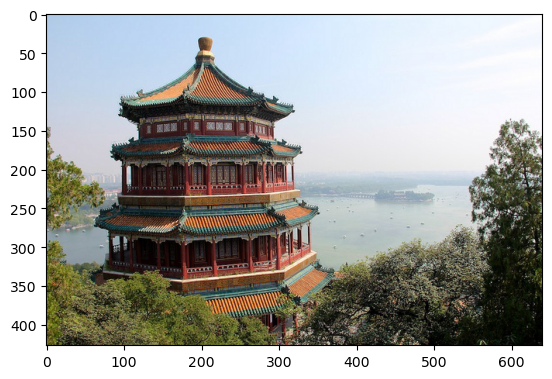

In [15]:
plt.imshow(images[0])

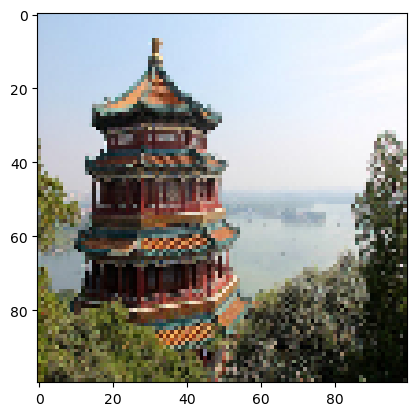

In [16]:
### Resize:
######

plt.imshow(tf.image.resize(images[0], [100,100]).numpy().astype(np.uint8))


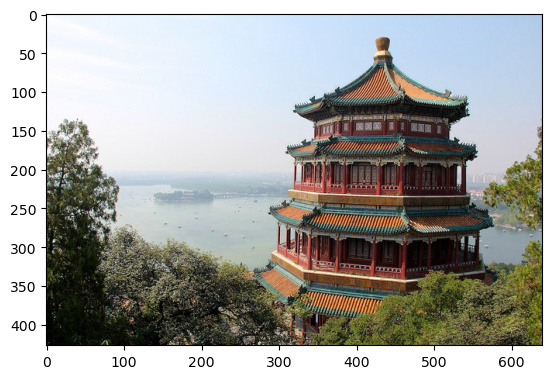

In [17]:
###Flip:
#####
plt.imshow(tf.image.flip_left_right(images[0]).numpy().astype(np.uint8))


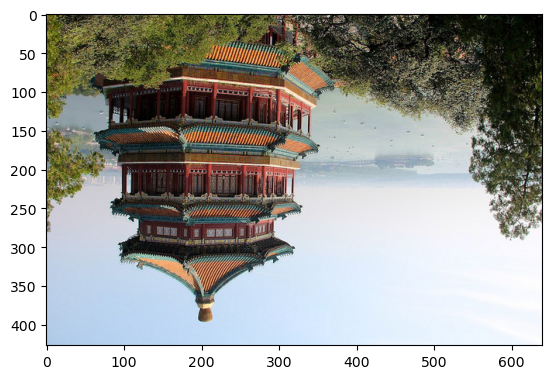

In [44]:
###Flip:
#####
plt.imshow(tf.image.flip_up_down(images[0]).numpy().astype(np.uint8))


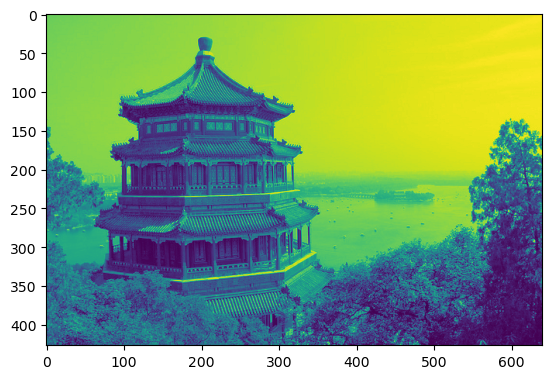

In [20]:
##To Grayscale:
gs = tf.image.rgb_to_grayscale(images[0])

plt.imshow(gs.numpy().astype(np.uint8))


<tf.Tensor: shape=(427, 640, 3), dtype=uint8, numpy=
array([[[196, 196, 196],
        [196, 196, 196],
        [196, 196, 196],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[194, 194, 194],
        [195, 195, 195],
        [195, 195, 195],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[196, 196, 196],
        [196, 196, 196],
        [196, 196, 196],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       ...,

       [[ 74,  74,  74],
        [133, 133, 133],
        [109, 109, 109],
        ...,
        [ 40,  40,  40],
        [ 10,  10,  10],
        [  8,   8,   8]],

       [[107, 107, 107],
        [115, 115, 115],
        [105, 105, 105],
        ...,
        [ 10,  10,  10],
        [ 11,  11,  11],
        [ 19,  19,  19]],

       [[ 99,  99,  99],
        [ 89,  89,  89],
        [ 95,  95,  95],
        ...,
        [ 46,  46,  4

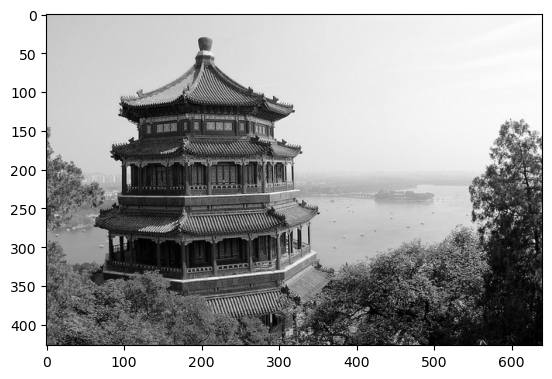

In [22]:
## And Back?
to_rgb = tf.image.grayscale_to_rgb(gs)
plt.imshow(to_rgb.numpy().astype(np.uint8))

to_rgb

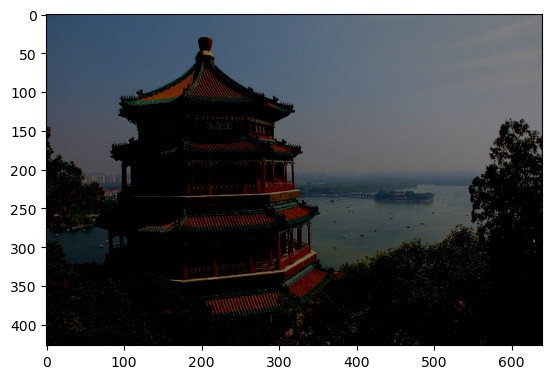

In [30]:
## Can adjust brightness, hue, etc.

plt.imshow(tf.image.adjust_brightness(images[0], -.5).numpy().astype(np.uint8))


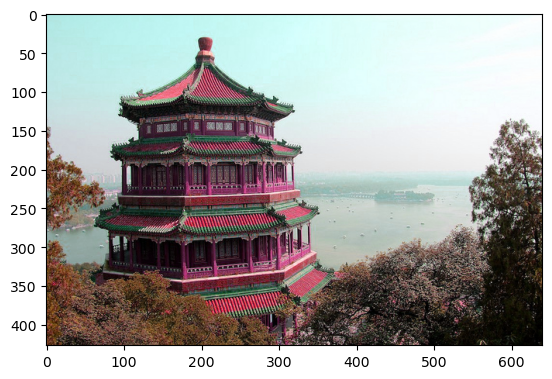

In [34]:
## hue

plt.imshow(tf.image.adjust_hue(images[0], .9).numpy().astype(np.uint8))

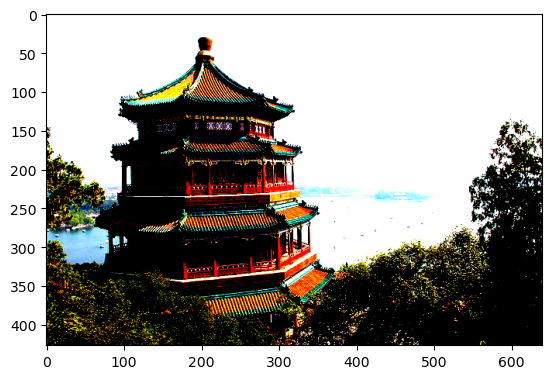

In [43]:
## contrast

plt.imshow(tf.image.adjust_contrast(images[0], 5).numpy().astype(np.uint8))

### Some Image Preprocessing Keras Layers

Various Keras layers can also provide data augmentation services:

- `tf.keras.layers.Resizing`
- `Rescaling`
- `CenterCrop`
- `RandomCrop`
- `RandomFlip`
- `RandomTranslation`
- `RandomRotation`
- `RandomZoom`
- `RandomHeight`
- `RandomWidth`
- `RandomContrast`

In [50]:
## Rescale:
images2 = tf.keras.layers.Rescaling(scale = 1/255)(images)

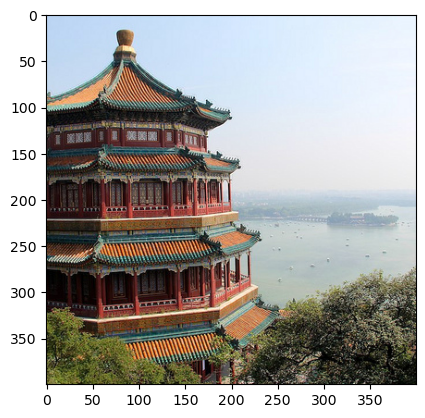

In [55]:
## CenterCrop to 400x400:
plt.imshow(tf.keras.layers.CenterCrop(height=400, width=400)(images2)[0])


In [66]:
#Apply layer to get new tensor:
crop_layer = tf.keras.layers.CenterCrop(height=128, width=128)
new_images = crop_layer(images2)

new_images

<tf.Tensor: shape=(2, 128, 128, 3), dtype=float32, numpy=
array([[[[0.2509804 , 0.09803922, 0.07843138],
         [0.40000004, 0.24313727, 0.23529413],
         [0.20000002, 0.08235294, 0.07450981],
         ...,
         [0.91372555, 0.91372555, 0.9450981 ],
         [0.91372555, 0.91372555, 0.9450981 ],
         [0.9176471 , 0.9176471 , 0.9490197 ]],

        [[0.38823533, 0.227451  , 0.21176472],
         [0.41176474, 0.25490198, 0.24705884],
         [0.20784315, 0.09019608, 0.08235294],
         ...,
         [0.909804  , 0.909804  , 0.94117653],
         [0.91372555, 0.91372555, 0.9450981 ],
         [0.91372555, 0.91372555, 0.9450981 ]],

        [[0.46274513, 0.30980393, 0.2901961 ],
         [0.34509805, 0.19607845, 0.18431373],
         [0.1764706 , 0.06666667, 0.05490196],
         ...,
         [0.9058824 , 0.9176471 , 0.9450981 ],
         [0.9176471 , 0.9176471 , 0.9490197 ],
         [0.9176471 , 0.9176471 , 0.9490197 ]],

        ...,

        [[0.4039216 , 0.48235297, 

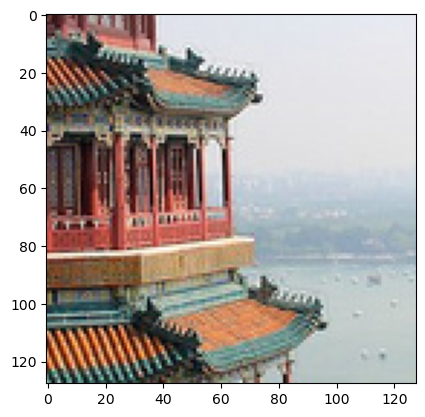

In [65]:

#Plot modified image:
plt.imshow(new_images[0])


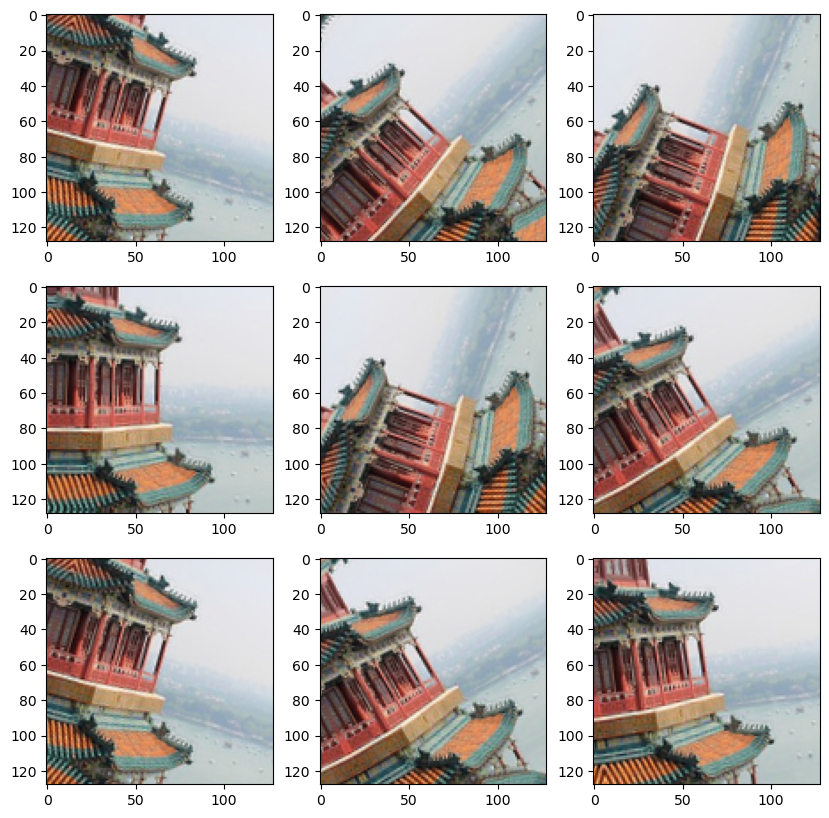

In [68]:
## Do a few rotations:
#######
rotate_layer = tf.keras.layers.RandomRotation(factor=.2, fill_mode='reflect')

fig1, ax1 = plt.subplots(3, 3, figsize=(10,10))
ax1 = ax1.flatten()

for k in range(9):    
    ax1[k].imshow(rotate_layer(new_images)[0])
    
